In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/df_main (1).csv')

EDA- Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a critical step in data analysis, helping you understand your data and uncover insights

In [ ]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,0,134116,4,51524,206428,23,2.999051,0,0,5,0,5,3,180,0,0,0,4
1,1,59689,4,60905,33006,23,2.998796,0,0,5,0,5,3,180,0,0,0,4
2,2,67942,4,52259,122570,23,2.999300,0,0,5,0,5,3,180,0,0,0,4
3,3,119573,4,42207,1205,8080,2.993548,0,0,5,0,5,3,180,0,0,0,4
4,4,257452,4,40459,150680,23,2.998807,0,0,5,0,5,3,180,0,0,0,4


In [ ]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label', 'detailed-label'],
      dtype='object')

In [ ]:
print(df.describe())


                  ts            uid      id.orig_h      id.orig_p  \
count  348640.000000  348640.000000  348640.000000  348640.000000   
mean   156114.673279  135053.924142       5.347559   46912.417281   
std     79697.846778   77922.177846       1.501180    8178.735184   
min         0.000000       0.000000       0.000000   32768.000000   
25%     87159.750000   67594.750000       4.000000   39820.000000   
50%    174319.500000  135055.500000       4.000000   47022.500000   
75%    225385.000000  202528.250000       7.000000   53961.000000   
max    270011.000000  270011.000000       7.000000   61530.000000   

           id.resp_h      id.resp_p       duration     orig_bytes  \
count  348640.000000  348640.000000  348640.000000  348640.000000   
mean   119622.287468    5720.612425       4.899602      21.225336   
std     64601.761761   14703.953994     342.746159     126.788080   
min         0.000000      22.000000       0.000001       0.000000   
25%     63509.000000      22.0000

In [ ]:
print(df.isnull().sum())

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
label             0
detailed-label    0
dtype: int64


Heatmaps are used to visualize the correlation between variables in a dataset, making it easier to identify relationships and patterns.


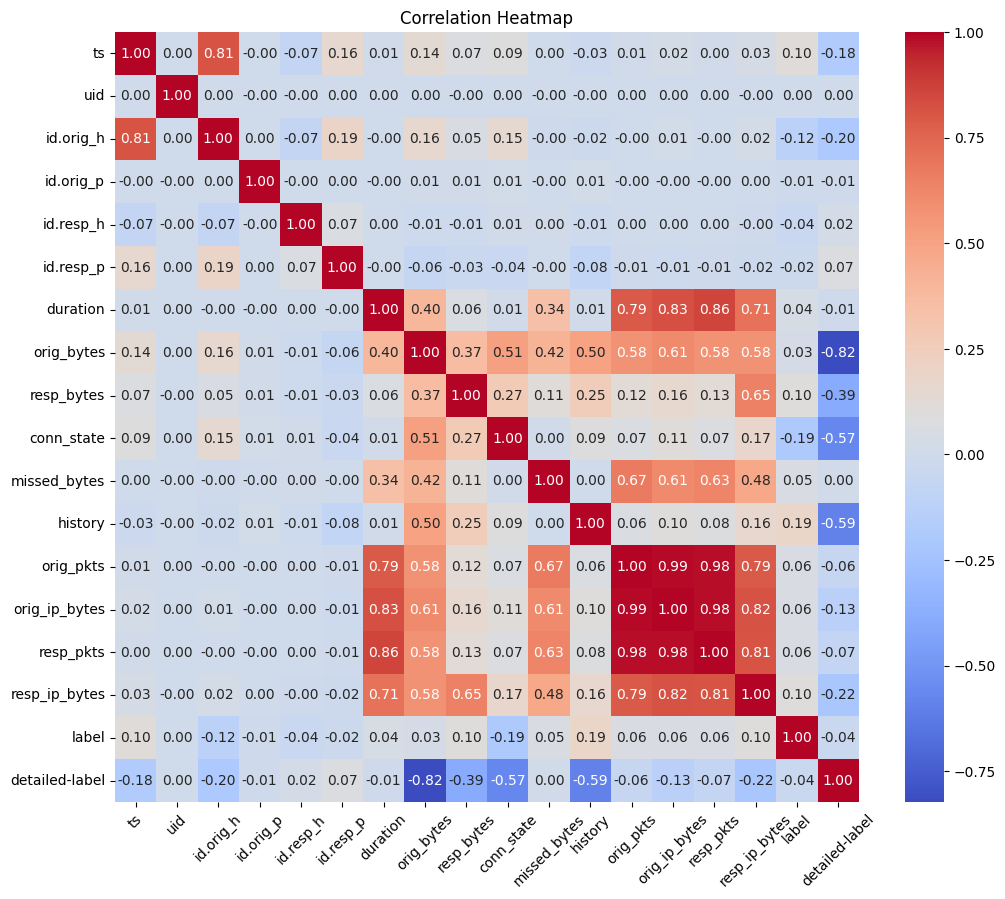

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the heatmap
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()


A scatterplot is a two-dimensional graphical representation that displays individual data points as dots, making it useful for visualizing the relationship and distribution of data points in a dataset.

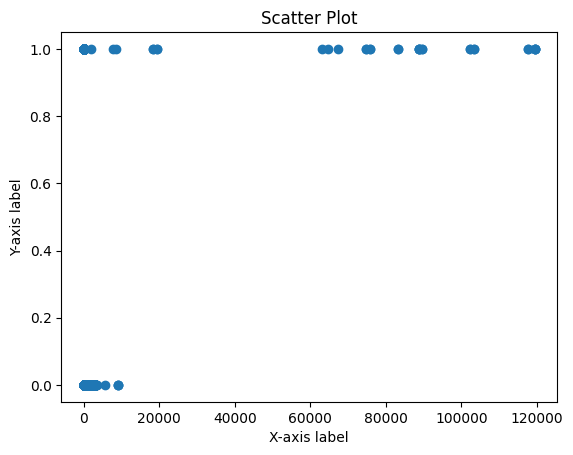

In [ ]:
plt.scatter(df['resp_bytes'], df['label'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()


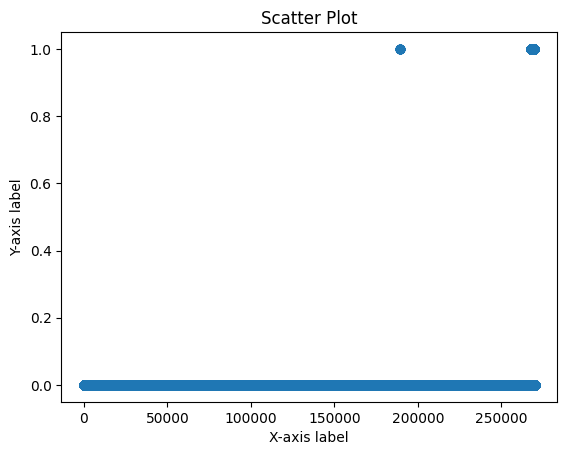

In [ ]:
plt.scatter(df['ts'], df['label'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()


We plotted boxplot for a numerical dataset in Python, you can use the seaborn library, which provides a high-level interface for creating attractive and informative statistical graphics.

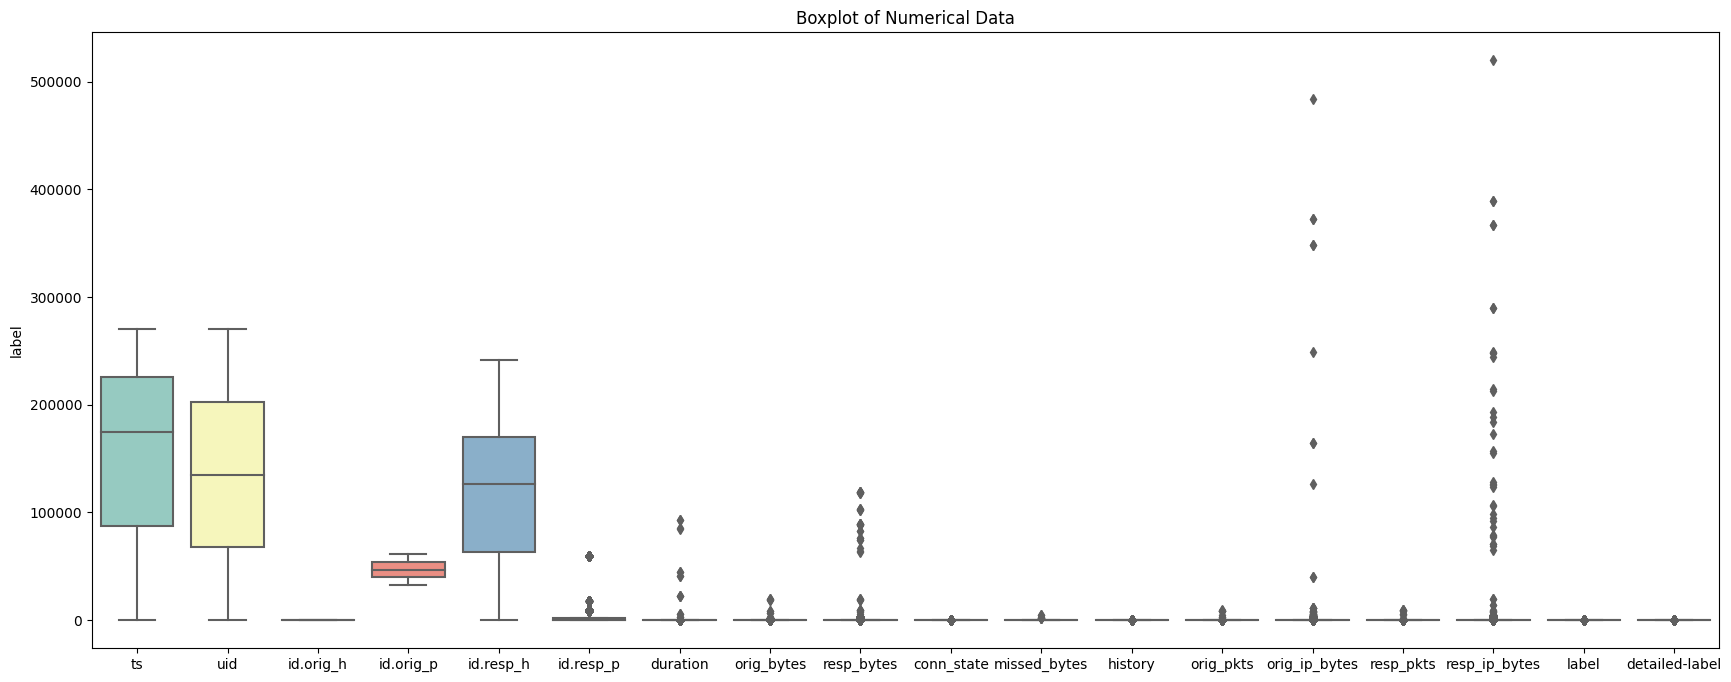

In [ ]:
# Create a boxplot
plt.figure(figsize=(21, 8))
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot of Numerical Data')
plt.ylabel('label')
plt.show()


Load your dataset, and split it into features (X) and the target variable(y) which is label. Make sure your dataset is structured with the target variable in a separate column.

In [ ]:



# Calculate the mode of the column
mode_value = df['label'].mode()[0]

# Replace missing values with the mode
df['label'].fillna(mode_value, inplace=True)

# Optionally, save the updated DataFrame back to a file
# df.to_csv('updated_dataset.csv', index=False)

In [ ]:
X = df.drop('label',axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Define X (features) and y (target variable)
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and a decision tree classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace with your preferred strategy
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


Created an instance of the DecisionTreeClassifier and fit it to our training data.:

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Use the trained model to make predictions on the test data.

In [ ]:
y_pred = clf.predict(X_test)


Assess the model's performance by calculating accuracy and other relevant metrics.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69390
           1       1.00      1.00      1.00       338

    accuracy                           1.00     69728
   macro avg       1.00      1.00      1.00     69728
weighted avg       1.00      1.00      1.00     69728

Confusion Matrix:
[[69390     0]
 [    0   338]]


Decision trees have various hyperparameters that you can adjust to improve the model's performance. You can explore parameters like max_depth, min_samples_split, and min_samples_leaf to optimize your model.



In [ ]:
# Example of hyperparameter tuning
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)